## 1. Install and import dependencies

In [ ]:
!pip install torch torchvision
!pip install easyocr

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt 
import numpy as np

## 2. Read in images and video

In [3]:
image_path = 'surf.jpeg'

In [4]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)

result

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/Users/mashrafirahman/Documents/OCR/OCR/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


[([[np.int32(18), np.int32(18)],
   [np.int32(293), np.int32(18)],
   [np.int32(293), np.int32(145)],
   [np.int32(18), np.int32(145)]],
  'SURF',
  np.float64(0.984316349029541))]

## 3.Draw Result

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])

text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

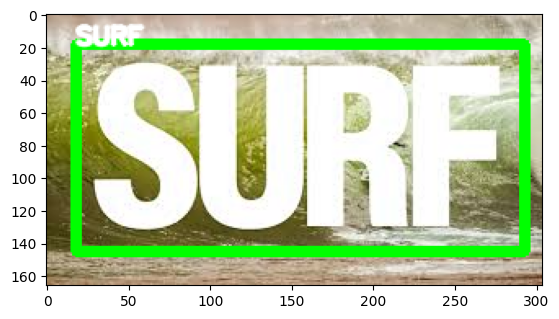

In [7]:
img = cv2.imread(image_path)
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 4. Reading Multiline Image

In [9]:
IMG_path = 'Out_of_service.webp'

In [11]:
result_4 = reader.readtext(IMG_path)
result_4

/Users/mashrafirahman/Documents/OCR/OCR/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


[([[np.int32(67), np.int32(377)],
   [np.int32(391), np.int32(377)],
   [np.int32(391), np.int32(463)],
   [np.int32(67), np.int32(463)]],
  'OUT OF',
  np.float64(0.9342489332927736)),
 ([[np.int32(43), np.int32(471)],
   [np.int32(416), np.int32(471)],
   [np.int32(416), np.int32(555)],
   [np.int32(43), np.int32(555)]],
  'SERVICE',
  np.float64(0.999685937647594))]

Couldn't read the tiny texts the image has at the bottom right corner. Those are really tiny. But we can trick to visualize it. 
So, though the model can easily read the bigger or more focused one. There could be other reasons too.
The image has very low quality. It could be a reason of failure too. 

Note: The model is power enough to read all the texts in pretty much every cases

## 5. Visualizing Multiple Lines

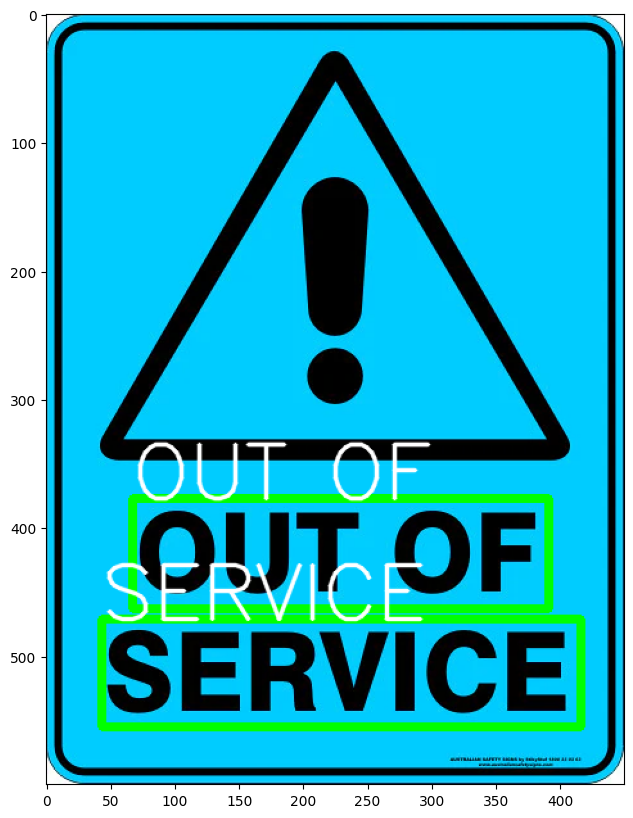

In [14]:
img = cv2.imread(IMG_path)
for detection in result_4:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, 2, (255, 255, 255), 2, cv2.LINE_AA)
    
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()